In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Leer DataFrames

In [2]:
import os

URLS = os.listdir(path="./csv-files")
len(URLS)

60

In [3]:
import pandas as pd

dfs = []

for url in URLS:
    df = pd.read_csv("./csv-files/"+url)
    dfs.append(df)

aux_df = pd.concat(dfs)
aux_df.shape

(17481757, 47)

# Diccionario de ataques

In [5]:
attacks_dict = {"DDoS":r'^DDoS-.*',"DoS":r'^DoS-.*',"Spoofing":r'.*[s|S]poofing$',"Mirai":r'^Mirai-.*',"Recon":r'^Recon-.*|VulnerabilityScan',"Web Based":r'SqlInjection|Backdoor_Malware|XSS|CommandInjection|Uploading_Attack|BrowserHijacking',"Brute Force":r'DictionaryBruteForce',"Benign Traffic":r'BenignTraffic'}
print(len(attacks_dict.keys()))

8


# Agrupar Ataques por categoría

In [6]:
for key, value in attacks_dict.items():
    aux_df["label"].replace(value, key, regex=True, inplace=True)

C:\Users\SANTIAGO\AppData\Local\Temp\ipykernel_12328\753318710.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aux_df["label"].replace(value, key, regex=True, inplace=True)


label
DDoS              12725513
DoS                3028891
Mirai               987144
Benign Traffic      410792
Spoofing            182027
Recon               133252
Web Based             9226
Brute Force           4912
Name: count, dtype: int64


<Axes: >

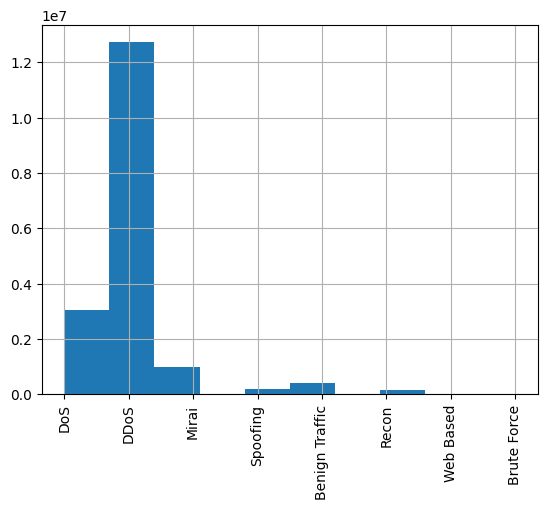

In [8]:
print(aux_df["label"].value_counts())
aux_df["label"].hist(xrot=90)

# Delete non-representative categories

label
DDoS              12725513
DoS                3028891
Mirai               987144
Benign Traffic      410792
Spoofing            182027
Name: count, dtype: int64


<Axes: >

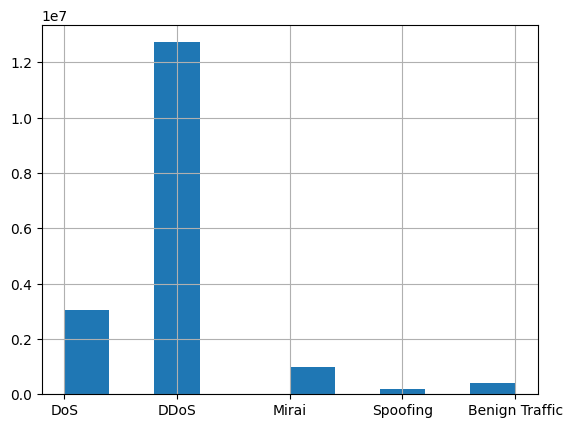

In [9]:
labels = aux_df["label"].unique()
THRESHOLD = 180000

for label in labels:
    mask = aux_df["label"]==label
    label_count = mask.sum()

    if label_count<THRESHOLD:
        aux_df = aux_df.loc[~mask]

print(aux_df["label"].value_counts())
aux_df["label"].hist()

# Preserving an equal number of records for each category

In [10]:
final_df = aux_df.groupby("label").head(THRESHOLD).reset_index(drop=True)

In [12]:
final_df = final_df.sample(170000)
print(final_df["label"].value_counts())
final_df.to_csv("./cic_dataset.csv", index=False)

label
DoS               34246
DDoS              34202
Mirai             34040
Spoofing          33902
Benign Traffic    33610
Name: count, dtype: int64
